In [2]:
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from knn_fish_detector import KNN

In [4]:
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [6]:
knn = KNN(7)
knn.fit(X_train, y_train)

In [7]:
df = pd.DataFrame()
n_neighbors, scores = [], []

for k in range(1, 22, 2):
    knn = KNN(k)
    knn.fit(X_train, y_train)
    score = knn.evaluate(X_test, y_test)

    n_neighbors.append(k)
    scores.append(score)

df["n_neighbors"] = n_neighbors
df["scores"] = scores

df

,n_neighbors,scores
0,1,0.894737
1,3,0.894737
2,5,0.903509
3,7,0.894737
4,9,0.903509
5,11,0.903509
6,13,0.894737
7,15,0.894737
8,17,0.894737
9,19,0.894737


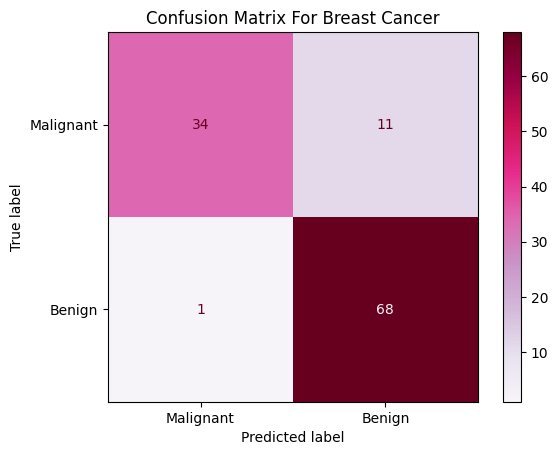

In [9]:
y_pred = knn.predict(X_test)
confusion = confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion, display_labels=["Malignant", "Benign"])
cm_display.plot(cmap='PuRd')
plt.title("Confusion Matrix For Breast Cancer")
plt.show()